In [1]:
!pip install --upgrade summa
!pip install --upgrade nltk #3.9.1

  Using cached summa-1.2.0-py3-none-any.whl


In [2]:
from importlib.metadata import version
import nltk
import torch
import summa
import pandas as pd

print(nltk.__version__)
print(torch.__version__)
print(pd.__version__)
print(version('summa'))

3.9.1
2.6.0+cu124
2.2.2
1.2.0


In [3]:
import pandas as pd
import urllib.request

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv",
    filename="news_summary_more.csv"
)

data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

print(data.columns)
print(data.head())


Index(['headlines', 'text'], dtype='object')
                                           headlines  \
0  upGrad learner switches to career in ML & Al w...   
1  Delhi techie wins free food from Swiggy for on...   
2  New Zealand end Rohit Sharma-led India's 12-ma...   
3  Aegon life iTerm insurance plan helps customer...   
4  Have known Hirani for yrs, what if MeToo claim...   

                                                text  
0  Saurav Kant, an alumnus of upGrad and IIIT-B's...  
1  Kunal Shah's credit card bill payment platform...  
2  New Zealand defeated India by 8 wickets in the...  
3  With Aegon Life iTerm Insurance plan, customer...  
4  Speaking about the sexual harassment allegatio...  


In [4]:
data.duplicated(subset='text').sum()

np.int64(41)

In [5]:
data.duplicated(subset='headlines').sum()

np.int64(121)

In [6]:
data.drop_duplicates(subset='text', inplace=True)

In [7]:
data.isnull().sum()

,0
headlines,0
text,0


In [8]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [9]:
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def preprocess_sentence(sentence, remove_stopwords=True):
  sentence=sentence.lower()
  sentence=BeautifulSoup(sentence, "lxml").text
  sentence = re.sub(r'\([^)]*\)', '', sentence)
  sentence = re.sub('"', '', sentence)
  sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])
  sentence = re.sub(r"'s\b", "", sentence)  # убираем 's
  sentence = re.sub("[^a-zA-Z]", " ", sentence)  # оставляем только буквы
  sentence = re.sub('[m]{2,}', 'mm', sentence)

  if remove_stopwords:
    tokens=' '.join(word for word in sentence.split() if word not in stopwords.words('english') and len(word)>1)
  else:
    tokens=' '.join(word for word in sentence.split() if len(word)>1)

  return tokens


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
data['text']=data['text'].apply(lambda x: preprocess_sentence(x))
data['headlines']=data['headlines'].apply(lambda x: preprocess_sentence(x, remove_stopwords=False))

Text(0.5, 1.0, 'Headlines length')

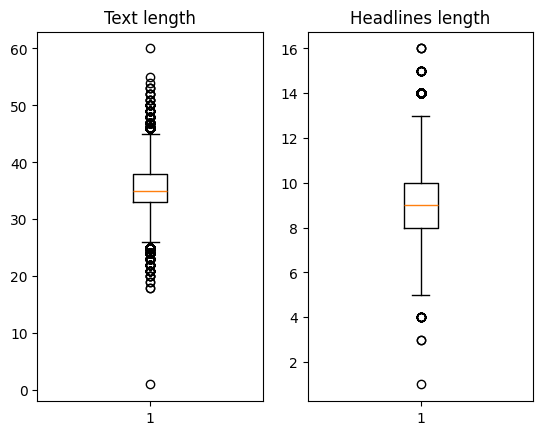

In [11]:
import matplotlib.pyplot as plt
text_len=[len(s.split()) for s in data['text']]
headlines_len=[len(s.split()) for s in data['headlines']]

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text length')

plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('Headlines length')

Text(0.5, 1.0, 'Headlines length')

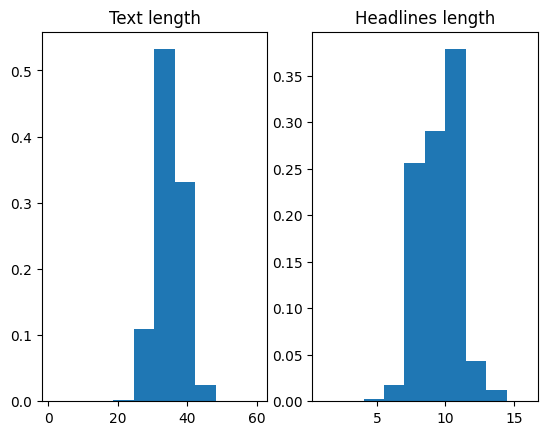

In [12]:
import numpy as np
plt.subplot(1,2,1)
plt.hist(text_len, weights=np.ones_like(text_len) / len(text_len))
plt.title('Text length')

plt.subplot(1,2,2)
plt.hist(headlines_len, weights=np.ones_like(headlines_len)/len(headlines_len))
plt.title('Headlines length')

In [13]:
text_max_len=100
headlines_max_len=18

data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]

print('전체 샘플수 :', len(data))



전체 샘플수 : 98360


In [14]:
data['decoder_input']=data['headlines'].apply(lambda x: 'sostoken '+x)
data['decoder_target']=data['headlines'].apply(lambda x: x+' eostoken')

In [15]:
encoder_input = np.array(data['text'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])


In [16]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[90048 22330 51687 ... 96919 24675 44937]


In [17]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]


In [18]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 19672


In [19]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 78688
훈련 레이블의 개수 : 78688
테스트 데이터의 개수 : 19672
테스트 레이블의 개수 : 19672


In [20]:
from collections import Counter
def src_tokenizer(text): # 토크나이저 정의
    text = text.lower()  # 소문자로 변환
    text = re.sub(r"[^a-zA-Z0-9]+", " ", text)  # 특수문자 제거
    return text.split()  # 공백 기준 토큰화

def build_vocab(texts):
    vocab = {"<PAD>": 0, "<UNK>": 1}  # 패딩과 UNK 토큰 추가
    word_counter = Counter()

    for text in texts:
        word_counter.update(src_tokenizer(text))  # 단어 빈도수 계산

    # 단어 집합 생성 (빈도가 높은 순서대로)
    for word, _ in word_counter.most_common():
        if word not in vocab:
            vocab[word] = len(vocab)

    return vocab

src_vocab = build_vocab(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [21]:
def text_to_sequence(texts, vocab):
    sequences = []
    for text in texts:
        sequence = [vocab.get(word, vocab["<UNK>"]) for word in src_tokenizer(text)]
        sequences.append(sequence)
    return sequences

encoder_input_train_seq = text_to_sequence(encoder_input_train, src_vocab)
encoder_input_test_seq = text_to_sequence(encoder_input_test, src_vocab)


print(encoder_input_train_seq[:3])
print(encoder_input_test_seq[:3])

[[5564, 1092, 5565, 3881, 1355, 29623, 29624, 305, 570, 8144, 8, 710, 414, 5565, 2145, 3881, 20, 62, 10711, 5565, 1355, 29624, 524, 836, 24, 675, 129, 5444, 378, 529, 414, 307, 5565, 3881, 3863], [4, 14, 161, 2723, 434, 462, 31, 2394, 2058, 4845, 209, 603, 6479, 1225, 78, 1544, 844, 161, 570, 188, 78, 545, 2280, 1258, 21, 114, 3882, 10, 2, 161, 13347, 1935, 414, 30, 4], [80, 2010, 142, 76, 628, 9668, 985, 1743, 4488, 26331, 163, 12934, 2482, 80, 166, 3278, 7168, 6197, 12935, 8979, 34888, 26332, 29625, 34889, 424, 2989, 4488, 163, 2010, 2, 191, 8, 492, 52, 2128, 7566, 12934]]
[[6364, 17, 27540, 25018, 66, 6611, 16177, 5992, 1531, 96, 9059, 8092, 81, 2250, 697, 248, 732, 1008, 1044, 200, 45405, 22, 63, 213, 61, 82, 24, 9059, 8092, 3029, 697, 200, 1359, 23396], [231, 85, 359, 9, 1523, 96, 1, 1502, 1293, 18706, 17781, 378, 529, 3444, 2393, 3709, 6646, 3709, 24641, 5812, 3188, 13608, 513, 1468, 16722, 3477, 327, 1892, 3709, 6060, 1, 153, 3444, 2393, 378, 1293, 293, 96, 259], [1997, 2915, 28

In [22]:
def tar_tokenizer(text):
    text = text.lower()  # 소문자로 변환
    text = re.sub(r"[^a-zA-Z0-9]+", " ", text)  # 특수문자 제거
    return text.split()  # 공백 기준 토큰화

tar_vocab = build_vocab(decoder_input_train)


In [23]:

tar_vocab = build_vocab(decoder_input_train + decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train_seq = text_to_sequence(decoder_input_train, tar_vocab)
decoder_target_train_seq = text_to_sequence(decoder_target_train, tar_vocab)
decoder_input_test_seq = text_to_sequence(decoder_input_test, tar_vocab)
decoder_target_test_seq = text_to_sequence(decoder_target_test, tar_vocab)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train_seq[:5])
print('target')
print('decoder ',decoder_target_train_seq[:5])

input
input  [[2, 2479, 203, 735, 597, 323, 294, 8386, 1513, 2479], [2, 81, 24, 130, 424, 303, 136, 17, 1283, 5743, 209, 5, 580], [2, 1312, 930, 4173, 6, 4100, 15756, 197, 5, 1904], [2, 626, 7, 547, 2245, 18, 1788, 7, 15757, 51], [2, 190, 271, 293, 1202, 4, 2562, 4338, 17, 4649, 5483]]
target
decoder  [[2479, 203, 735, 597, 323, 294, 8386, 1513, 2479, 3], [81, 24, 130, 424, 303, 136, 17, 1283, 5743, 209, 5, 580, 3], [1312, 930, 4173, 6, 4100, 15756, 197, 5, 1904, 3], [626, 7, 547, 2245, 18, 1788, 7, 15757, 51, 3], [190, 271, 293, 1202, 4, 2562, 4338, 17, 4649, 5483, 3]]


In [24]:
from torch.nn.utils.rnn import pad_sequence

def convert_to_tensor(sequences):
    return [torch.tensor(seq, dtype=torch.long) for seq in sequences]

def pad_sequences_pytorch(sequences, maxlen, padding_value=0):
    sequences = convert_to_tensor(sequences)  # 리스트를 텐서로 변환
    padded_seqs = pad_sequence(sequences, batch_first=True, padding_value=padding_value)  # 패딩 적용
    return padded_seqs[:, :maxlen]  # maxlen 길이로 자르기 (최대 길이 초과 방지)

# 패딩 적용
encoder_input_train = pad_sequences_pytorch(encoder_input_train_seq, maxlen=text_max_len)
encoder_input_test = pad_sequences_pytorch(encoder_input_test_seq, maxlen=text_max_len)
decoder_input_train = pad_sequences_pytorch(decoder_input_train_seq, maxlen=headlines_max_len)
decoder_target_train = pad_sequences_pytorch(decoder_target_train_seq, maxlen=headlines_max_len)
decoder_input_test = pad_sequences_pytorch(decoder_input_test_seq, maxlen=headlines_max_len)
decoder_target_test = pad_sequences_pytorch(decoder_target_test_seq, maxlen=headlines_max_len)


In [25]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Encoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, pad_idx, num_layers=2, dropout=0.3):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=pad_idx)
        self.emb_drop = nn.Dropout(dropout)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True, num_layers=num_layers, dropout=dropout)
    def forward(self, x):
        emb = self.emb_drop(self.embedding(x))
        outputs, (h, c) = self.lstm(emb)
        return outputs, h, c

class Decoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, pad_idx, num_layers=2, dropout=0.3):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=pad_idx)
        self.emb_drop = nn.Dropout(dropout)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True, num_layers=num_layers, dropout=dropout)
    def forward(self, x, h, c):
        emb = self.emb_drop(self.embedding(x))
        outputs, (h, c) = self.lstm(emb, (h, c))
        return outputs, h, c

class Attention_dot(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
    def forward(self, dec_out, enc_out):
        attn = torch.bmm(dec_out, enc_out.transpose(1,2))
        attn = F.softmax(attn, dim=-1)
        ctx = torch.bmm(attn, enc_out)
        return ctx

class Seq2SeqWithAttention(nn.Module):
    def __init__(self, encoder, decoder, vocab_size, hidden_size, dropout=0.3):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.attn = Attention_dot(hidden_size)
        self.concat = nn.Linear(hidden_size*2, hidden_size)
        self.out = nn.Linear(hidden_size, vocab_size)
        self.drop = nn.Dropout(dropout)
    def forward(self, enc_in, dec_in):
        enc_out, h, c = self.encoder(enc_in)
        dec_out, _, _ = self.decoder(dec_in, h, c)
        ctx = self.attn(dec_out, enc_out)
        x = torch.cat([dec_out, ctx], dim=-1)
        x = torch.tanh(self.concat(self.drop(x)))
        logits = self.out(self.drop(x))
        return logits

src_pad_idx = src_vocab["<PAD>"]
tar_pad_idx = tar_vocab["<PAD>"]
src_vocab_size = len(src_vocab)
tar_vocab_size = len(tar_vocab)
embed_size = 128
hidden_size = 256

encoder = Encoder(src_vocab_size, embed_size, hidden_size, src_pad_idx, num_layers=2, dropout=0.3)
decoder = Decoder(tar_vocab_size, embed_size, hidden_size, tar_pad_idx, num_layers=2, dropout=0.3)
model = Seq2SeqWithAttention(encoder, decoder, tar_vocab_size, hidden_size, dropout=0.3).to(device)

BATCH = 64
train_ds = TensorDataset(encoder_input_train, decoder_input_train, decoder_target_train)
val_ds   = TensorDataset(encoder_input_test,  decoder_input_test,  decoder_target_test)
train_loader = DataLoader(train_ds, batch_size=BATCH, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=BATCH)

criterion = nn.CrossEntropyLoss(ignore_index=tar_pad_idx, label_smoothing=0.1)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

best_val = float("inf")
patience = 3
wait = 0
history = {"train_loss": [], "val_loss": []}

EPOCHS = 5
for epoch in range(EPOCHS):
    model.train()
    tr = 0.0
    for enc_in, dec_in, dec_tg in train_loader:
        enc_in, dec_in, dec_tg = enc_in.to(device), dec_in.to(device), dec_tg.to(device)
        optimizer.zero_grad()
        logits = model(enc_in, dec_in)
        loss = criterion(logits.view(-1, tar_vocab_size), dec_tg.view(-1))
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        tr += loss.item()
    tr /= len(train_loader)

    model.eval()
    vl = 0.0
    with torch.no_grad():
        for enc_in, dec_in, dec_tg in val_loader:
            enc_in, dec_in, dec_tg = enc_in.to(device), dec_in.to(device), dec_tg.to(device)
            logits = model(enc_in, dec_in)
            loss = criterion(logits.view(-1, tar_vocab_size), dec_tg.view(-1))
            vl += loss.item()
    vl /= len(val_loader)

    history["train_loss"].append(tr)
    history["val_loss"].append(vl)
    print(f"Epoch {epoch+1}/{EPOCHS} | Train {tr:.4f} | Val {vl:.4f}")

    if vl < best_val - 1e-4:
        best_val = vl
        wait = 0
        best_state = {k:v.cpu().clone() for k,v in model.state_dict().items()}
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping")
            break

model.load_state_dict(best_state)


Epoch 1/5 | Train 7.8677 | Val 7.3270
Epoch 2/5 | Train 7.0940 | Val 6.7398
Epoch 3/5 | Train 6.6612 | Val 6.4002
Epoch 4/5 | Train 6.3564 | Val 6.1646
Epoch 5/5 | Train 6.1199 | Val 5.9934


<All keys matched successfully>

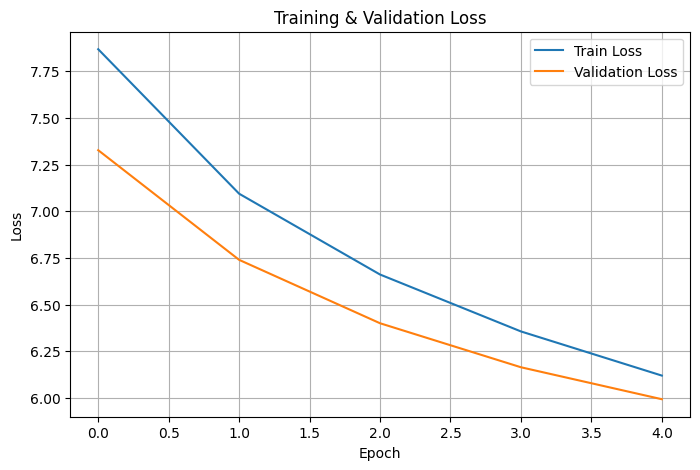

In [26]:

plt.figure(figsize=(8,5))
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
src_index_to_word = {idx:w for w,idx in src_vocab.items()}
tar_index_to_word = {idx:w for w,idx in tar_vocab.items()}
pad_src = src_vocab["<PAD>"]
pad_tgt = tar_vocab["<PAD>"]
sos_id  = tar_vocab["sostoken"]
eos_id  = tar_vocab["eostoken"]

def seq2text(ids_row):
    return " ".join(src_index_to_word.get(int(t), "<UNK>") for t in ids_row if int(t) != pad_src)

def seq2summary(ids_row):
    keep = []
    for t in ids_row:
        t = int(t)
        if t not in (pad_tgt, sos_id, eos_id):
            keep.append(tar_index_to_word.get(t, "<UNK>"))
    return " ".join(keep)

@torch.no_grad()
def beam_search_decode(model, src_row, beam_size=3, max_len=headlines_max_len):
    if src_row.dim() == 1:
        src_row = src_row.unsqueeze(0)
    src_row = src_row.to(device)
    enc_out, h, c = model.encoder(src_row)
    beams = [(0.0, [sos_id], h, c)]
    for _ in range(max_len):
        new_beams = []
        for score, seq, h_i, c_i in beams:
            last = torch.tensor([[seq[-1]]], device=device, dtype=torch.long)
            dec_out, h_n, c_n = model.decoder(last, h_i, c_i)
            ctx = model.attn(dec_out, enc_out)
            x = torch.cat([dec_out, ctx], dim=-1)
            x = torch.tanh(model.concat(x))
            logits = model.out(x)[0, -1, :]
            logp = F.log_softmax(logits, dim=-1)
            topk = torch.topk(logp, beam_size)
            for lp, idx in zip(topk.values.tolist(), topk.indices.tolist()):
                new_seq = seq + [idx]
                new_score = score + lp
                new_beams.append((new_score, new_seq, h_n, c_n))
        beams = sorted(new_beams, key=lambda x: x[0], reverse=True)[:beam_size]
        if any(seq[-1] == eos_id for _, seq, _, _ in beams):
            break
    best = max(beams, key=lambda x: x[0])[1]
    out = []
    for t in best:
        if t in (sos_id, eos_id, pad_tgt):
            continue
        out.append(tar_index_to_word.get(t, "<UNK>"))
    return " ".join(out)

N = 5
start = 50
for i in range(start, start + N):
    src_row = encoder_input_test[i]
    tgt_row = decoder_target_test[i]
    original_text = seq2text(src_row)
    reference_summary = seq2summary(tgt_row)
    predicted_summary = beam_search_decode(model, src_row, beam_size=3, max_len=headlines_max_len)
    print(f"\n=== SAMPLE {i} ===")
    print("[Original Text]\n", original_text)
    print("[Reference Summary]\n", reference_summary)
    print("[Predicted Summary]\n", predicted_summary)



=== SAMPLE 50 ===
[Original Text]
 us president donald trump monday said willing meet iranian president hassan rouhani without preconditions want meet meet meet anybody believe meetings added response advisor rouhani said returning nuclear deal respecting iranian nation rights would pave way talks
[Reference Summary]
 willing to talk to iran prez without <UNK> trump
[Predicted Summary]
 will not be ready to end iran president trump

=== SAMPLE 51 ===
[Original Text]
 rbi revised know customer guidelines making aadhaar key conducting customer due diligence banks finance companies rbi discarded sections relating use officially valid documents lenders address identity proof however new norms subject final judgment supreme court aadhaar
[Reference Summary]
 rbi revises kyc norms makes aadhaar bank linkage must
[Predicted Summary]
 rbi asks aadhaar to ban aadhaar aadhaar for aadhaar

=== SAMPLE 52 ===
[Original Text]
 almost seven years bjp leaders barring attended dinner hosted bihar cm n

In [28]:
import pandas as pd
from summa.summarizer import summarize

raw = pd.read_csv("news_summary_more.csv", encoding="iso-8859-1")[["text","headlines"]].drop_duplicates(subset="text")
for i in range(5):
    t = str(raw["text"].iloc[i])
    print("\n[Original]\n", t[:800])
    print("[Extractive]\n", summarize(t, ratio=0.2) or summarize(t, words=60))



[Original]
 Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
[Extractive]
 Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience.
The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike.
upGrad's Online Power Learning has powered 3 lakh+ careers.

[Original]
 Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users ge

회고
전처리(정제, 정규화, 불용어 제거, 데이터 분리, 인코딩)가 체계적으로 완료됨.

LSTM+Attention 기반 Abstractive 모델이 학습되었고, train loss와 val loss가 전반적으로 감소.

예측 요약문이 실제 요약문의 핵심 단어를 일부 포함했으나 문법 완성도와 정보 보존 측면에서 한계 존재.

Extractive 요약과 비교 시, 문법은 Extractive가 우수하나 문장 재구성 능력은 Abstractive가 강점.
